In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import time

In [2]:
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.initializers import RandomNormal  ## Weight initializer, there are many others as well
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
def plt_dynamic(x, vy, ty, ax):
    '''
    This function is used to update the plots for each epoch
    Inuts:
    x => epoch numbers
    vy => validation loss for each epoch
    ty => training loss for each epoch
    ax => matplotlib axis
    '''
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape", (X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape", (X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [8]:
# we will flatten the (28*28) vector into single dimensional vector of 1 * 784
# we also normalize the data by dividing each pixel by 255
X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train / 255

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test / 255

In [18]:
# Converting the output label into one-hot encoded vector
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

## Applying different models by changing various hyperparameters

### 1. Softmax Classifier + SGD Optimizer
Simple Logistic Regression without any hidden layer

In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [14]:
# start building a model
model = Sequential()

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [15]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s - loss: 1.2831 - acc: 0.6845 - val_loss: 0.8165 - val_acc: 0.8277
Epoch 2/20
60000/60000 [==============================] - 5s - loss: 0.7206 - acc: 0.8372 - val_loss: 0.6102 - val_acc: 0.8595
Epoch 3/20
60000/60000 [==============================] - 6s - loss: 0.5899 - acc: 0.8570 - val_loss: 0.5277 - val_acc: 0.8731
Epoch 4/20
60000/60000 [==============================] - 6s - loss: 0.5274 - acc: 0.8680 - val_loss: 0.4814 - val_acc: 0.8808
Epoch 5/20
60000/60000 [==============================] - 5s - loss: 0.4892 - acc: 0.8743 - val_loss: 0.4512 - val_acc: 0.8859
Epoch 6/20
60000/60000 [==============================] - 5s - loss: 0.4630 - acc: 0.8792 - val_loss: 0.4297 - val_acc: 0.8903
Epoch 7/20
60000/60000 [==============================] - 5s - loss: 0.4437 - acc: 0.8833 - val_loss: 0.4136 - val_acc: 0.8928
Epoch 8/20
60000/60000 [==============================] - 5s 

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.336058076662
Test accuracy: 0.909


In [23]:
history.history.keys()

dict_keys(['acc', 'val_loss', 'loss', 'val_acc'])

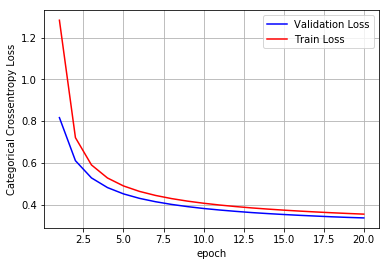

In [25]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']  # validation loss
ty = history.history['loss'] # training loss
plt_dynamic(x, vy, ty, ax)

### 2. MLP + Sigmoid activation + SGD Optimizer

In [26]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,))) ## hidden layer 1
model_sigmoid.add(Dense(128, activation='sigmoid'))  ## hidden layer 2
model_sigmoid.add(Dense(output_dim, activation='softmax'))  ## output layer

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train,
                            Y_train,
                            batch_size=batch_size,
                            epochs=nb_epoch,
                            verbose=1,
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s - loss: 2.2694 - acc: 0.2178 - val_loss: 2.2205 - val_acc: 0.4190
Epoch 2/20
60000/60000 [==============================] - 9s - loss: 2.1762 - acc: 0.4583 - val_loss: 2.1194 - val_acc: 0.5423
Epoch 3/20
60000/60000 [==============================] - 9s - loss: 2.0581 - acc: 0.5676 - val_loss: 1.9764 - val_acc: 0.6513
Epoch 4/20
60000/60000 [==============================] - 8s - loss: 1.8896 - acc: 0.6357 - val_loss: 1.7777 - val_acc: 0.6429
Epoch 5/20
60000/60000 [==============================] - 9s - loss: 1.6701 - acc: 0.6710 - val_loss: 1.5388 - val_acc: 0.7027
Epoch 6/20
60000/60000 [==============================] - 8s - loss: 1.4353 - acc: 0.7112 - val_loss: 1.3100 - val_acc: 0.7363
Epoch 7/20
60000/60000 [==============================] - 9s - loss: 1.2287 - acc: 0.7431 - val_loss: 1.1249 - val_acc: 0.7662
Epoch 8/20
60000/60000 [==============================] - 9s

In [28]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.463965779638
Test accuracy: 0.8778


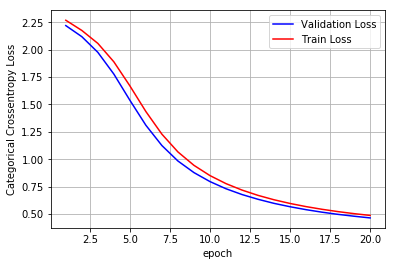

In [29]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Get the weights of the model

In [44]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1) # Get weights "w" of layer 1
h2_w = w_after[2].flatten().reshape(-1,1) # Get weights "w" of layer 2
out_w = w_after[4].flatten().reshape(-1,1) # Get weights "w" of layer 3 (output layer)

# Note w_after[1], w_after[3] and w_after[5] contain the biases of layers 1, 2 and 3 respectively

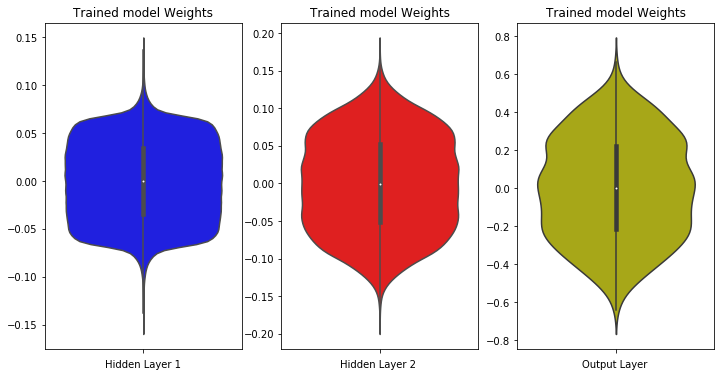

In [49]:
fig = plt.figure(figsize = (12,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3. MLP + Sigmoid activation + ADAM 

In [50]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train,
                            Y_train,
                            batch_size=batch_size,
                            epochs=nb_epoch,
                            verbose=1,
                            validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s - loss: 0.5302 - acc: 0.8600 - val_loss: 0.2497 - val_acc: 0.9290
Epoch 2/20
60000/60000 [==============================] - 11s - loss: 0.2220 - acc: 0.9340 - val_loss: 0.1806 - val_acc: 0.9448
Epoch 3/20
60000/60000 [==============================] - 11s - loss: 0.1631 - acc: 0.9512 - v

In [51]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0698687358584
Test accuracy: 0.9825


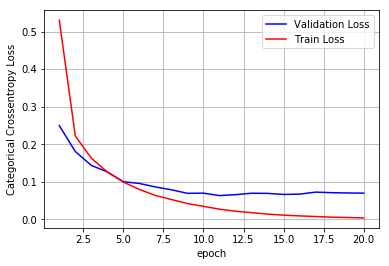

In [52]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

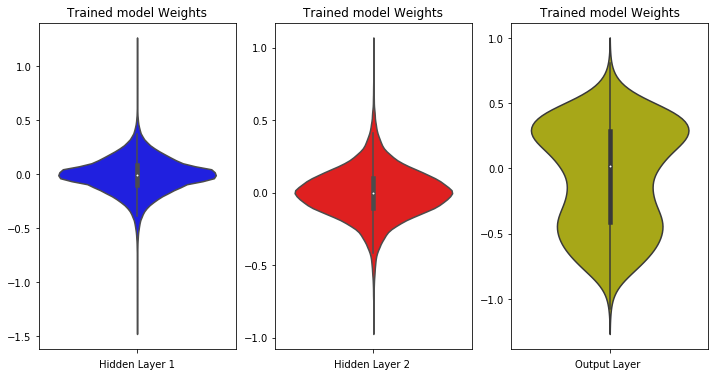

In [54]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize = (12,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 4. MLP + ReLU +SGD

In [55]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


**Note**: kernel_initializer is the way to mention how we want to initialize the weights of the network. There are many ways, just try to search for "Keras initializers"

In [56]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train,
                         Y_train,
                         batch_size=batch_size,
                         epochs=nb_epoch,
                         verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s - loss: 0.7652 - acc: 0.7890 - val_loss: 0.3912 - val_acc: 0.8938
Epoch 2/20
60000/60000 [==============================] - 8s - loss: 0.3575 - acc: 0.9010 - val_loss: 0.2984 - val_acc: 0.9173
Epoch 3/20
60000/60000 [==============================] - 9s - loss: 0.2916 - acc: 0.9178 - val_loss: 0.2604 - val_acc: 0.9264
Epoch 4/20
60000/60000 [==============================] - 9s - loss: 0.2556 - acc: 0.9280 - val_loss: 0.2324 - val_acc: 0.9352
Epoch 5/20
60000/60000 [==============================] - 9s - loss: 0.2312 - acc: 0.9346 - val_loss: 0.2151 - val_acc: 0.9396
Epoch 6/20
60000/60000 [==============================] - 9s - loss: 0.2124 - acc: 0.9402 - val_loss: 0.2009 - val_acc: 0.9446
Epoch 7/20
60000/60000 [==============================] - 9s - loss: 0.1973 - acc: 0.9440 - val_loss: 0.1880 - val_acc: 0.9464
Epoch 8/20
60000/60000 [==============================] - 9s

In [57]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.119224257098
Test accuracy: 0.9647


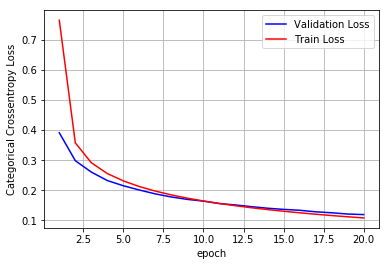

In [58]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

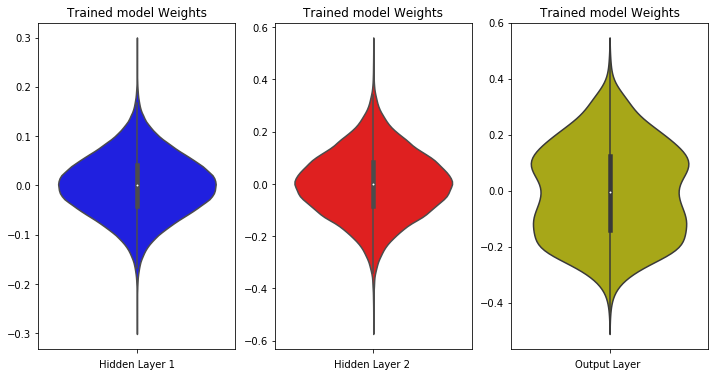

In [59]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize = (12, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5. MLP + ReLU + ADAM

In [60]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train,
                         Y_train,
                         batch_size=batch_size,
                         epochs=nb_epoch,
                         verbose=1,
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s - loss: 0.2326 - acc: 0.9306 - val_loss: 0.1272 - val_acc: 0.9618
Epoch 2/20
60000/60000 [==============================] - 12s - loss: 0.0832 - acc: 0.9755 - val_loss: 0.0870 - val_acc: 0.9733
Epoch 3/20
60000/60000 [==============================] - 12s - loss: 0.0535 - acc: 0.983

In [61]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.103625550569
Test accuracy: 0.9797


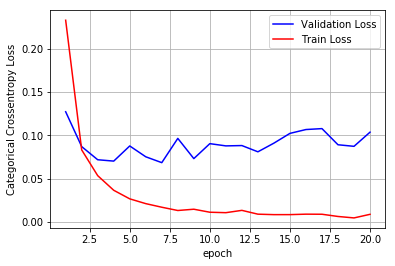

In [62]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

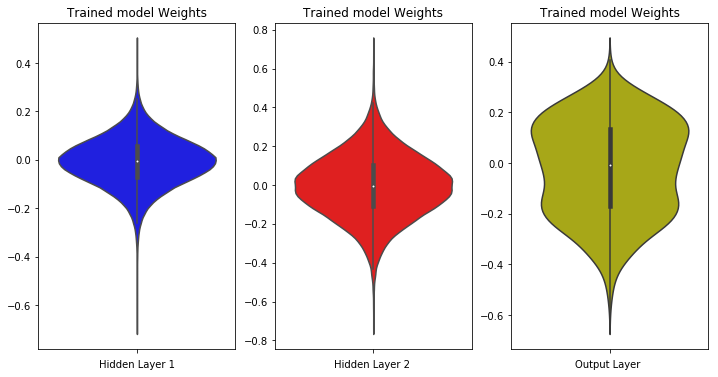

In [63]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 6. MLP + Batch-Norm on hidden Layers + AdamOptimizer 

In [65]:
model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())  ## BN for layer 1

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())  ## BN for layer 2

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [66]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train,
                          Y_train,
                          batch_size=batch_size,
                          epochs=nb_epoch,
                          verbose=1,
                          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s - loss: 0.3041 - acc: 0.9101 - val_loss: 0.2020 - val_acc: 0.9415
Epoch 2/20
60000/60000 [==============================] - 15s - loss: 0.1756 - acc: 0.9486 - val_loss: 0.1681 - val_acc: 0.9501
Epoch 3/20
60000/60000 [==============================] - 15s - loss: 0.1355 - acc: 0.9605 - val_loss: 0.1428 - val_acc: 0.9584
Epoch 4/20
60000/60000 [==============================] - 15s - loss: 0.1110 - acc: 0.9672 - val_loss: 0.1347 - val_acc: 0.9589
Epoch 5/20
60000/60000 [==============================] - 16s - loss: 0.0931 - acc: 0.9722 - val_loss: 0.1259 - val_acc: 0.9631
Epoch 6/20
60000/60000 [==============================] - 14s - loss: 0.0772 - acc: 0.9770 - val_loss: 0.1170 - val_acc: 0.9653
Epoch 7/20
60000/60000 [==============================] - 14s - loss: 0.0676 - acc: 0.9797 - val_loss: 0.1166 - val_acc: 0.9634
Epoch 8/20
60000/60000 [==============================

In [67]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.108910327811
Test accuracy: 0.9735


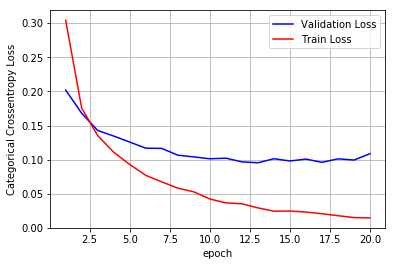

In [68]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

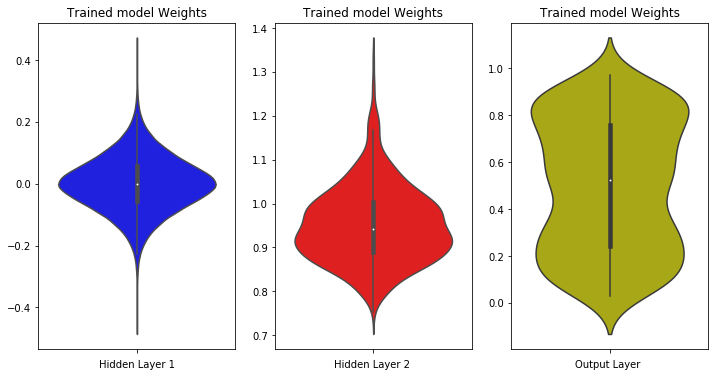

In [69]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 7. MLP + Dropout + AdamOptimizer

In [71]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))  ## Dropout for layer 1

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))  ## Dropout for layer 2

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total para

In [72]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train,
                         Y_train,
                         batch_size=batch_size,
                         epochs=nb_epoch,
                         verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s - loss: 0.6817 - acc: 0.7894 - val_loss: 0.2879 - val_acc: 0.9156
Epoch 2/20
60000/60000 [==============================] - 17s - loss: 0.4316 - acc: 0.8684 - val_loss: 0.2511 - val_acc: 0.9269
Epoch 3/20
60000/60000 [==============================] - 17s - loss: 0.3877 - acc: 0.8835 - val_loss: 0.2319 - val_acc: 0.9319
Epoch 4/20
60000/60000 [==============================] - 16s - loss: 0.3598 - acc: 0.8918 - val_loss: 0.2223 - val_acc: 0.9343
Epoch 5/20
60000/60000 [==============================] - 16s - loss: 0.3382 - acc: 0.8975 - val_loss: 0.2131 - val_acc: 0.9394
Epoch 6/20
60000/60000 [==============================] - 16s - loss: 0.3220 - acc: 0.9030 - val_loss: 0.2022 - val_acc: 0.9409
Epoch 7/20
60000/60000 [==============================] - 16s - loss: 0.3035 - acc: 0.9075 - val_loss: 0.1951 - val_acc: 0.9425
Epoch 8/20
60000/60000 [==============================

In [73]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.109596861588
Test accuracy: 0.9689


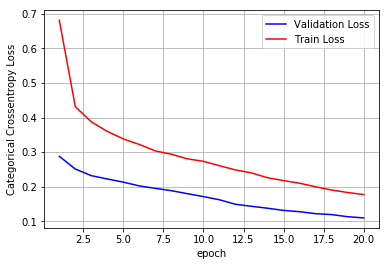

In [74]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

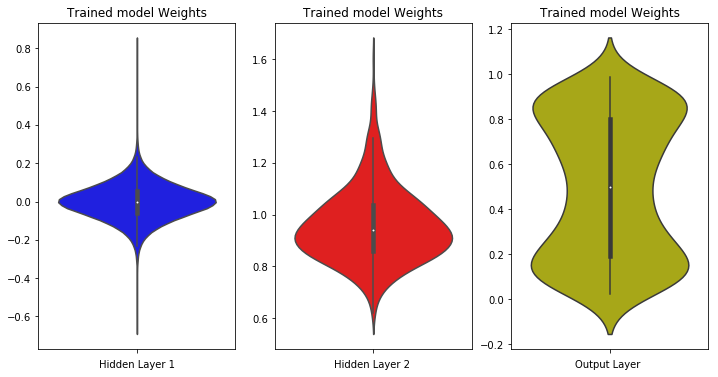

In [75]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()